# Diamond Prices Regression using Machine Learning

This Data is of diamond prices with their specifications. We are going to analyze this dataset by using python libraries pandas, numpy, matplotlib and seaborn and then we'll predict the price of diamond by using Regression.

The dataset contains 53940 rows and 10 variables. Before jumping into building the model, let’s have a look into the variables & their definitions.

Feature information:

1. price: Price in US dollars
2. carat: Weight of the diamond
3. cut: Quality of the cut (fair, good, very good, premium, ideal)
4. color: Diamond color, from J (worst) to D (best)
5. clarity: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. x: Length in mm
7. y: Width in mm
8. z: Depth in mm
9. depth: Total depth percentage = z / mean(x, y) = 2 * z / (x + y)
10. table: Width of the top of the diamond relative to the widest point

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style = "darkgrid")

In [2]:
diamond_data = pd.read_csv('DiamondsPrices.csv')

In [3]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamond_data.shape

(53940, 10)

In [5]:
diamond_data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [6]:
diamond_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The count, mean, min and max rows are self-explanatory. The std shows the standard deviation, and the 25%, 50% and 75% rows show the corresponding percentiles.

From describe we have observed that Min value of x, y, z are zero this indicates that there are faulty values in data that represents dimensionless or 2 dimenional diamonds. So we need to filter out those as it clearly faulty data points.

#### dropping dimenionless diamond

In [7]:
diamond_data = diamond_data.drop(diamond_data[diamond_data["x"] == 0].index)
diamond_data = diamond_data.drop(diamond_data[diamond_data["y"] == 0].index)
diamond_data = diamond_data.drop(diamond_data[diamond_data["z"] == 0].index)

In [8]:
diamond_data.shape

(53920, 10)

We lost 20 data points by deleting the dimenionless diamonds.

#### Checking if there is any null value

In [9]:
diamond_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

By obeserving all the columns there are not any null values.

#### Finding the Duplicated values

In [10]:
diamond_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53920, dtype: bool

In [11]:
diamond_data[diamond_data.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47296,0.30,Good,J,VS1,63.4,57.0,394,4.23,4.26,2.69
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [12]:
diamond_data.duplicated().sum()

145

We found there are total 145 duplicate values. Now we will drop all the duplicated values in dataset.

In [13]:
diamond_data.drop_duplicates(inplace= True)

In [14]:
diamond_data[diamond_data.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z


Now we have droped all the duplicated values by using drop command. There no duplicated values in the dataset.

<AxesSubplot:>

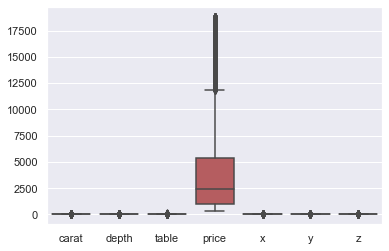

In [15]:
sns.boxplot(data = diamond_data)

The above box plot of data shows us that in column 'price' there are many outliers, so first we will remove all the outliers by using Statistical analysis.

# Statistical Analysis

<AxesSubplot:xlabel='price'>

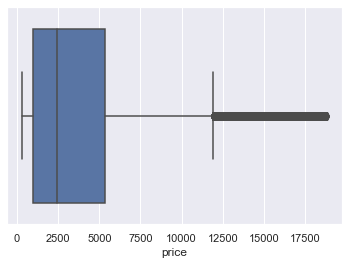

In [16]:
sns.boxplot(data = diamond_data, x = "price")

In [17]:
Q1 = diamond_data['price'].quantile(0.25)
print("first quartile = ", Q1)
Q3 = diamond_data['price'].quantile(0.75)
print("third quartile = ", Q3)

first quartile =  951.0
third quartile =  5324.0


In [18]:
IQR = Q3 - Q1
print(IQR)

4373.0


In [19]:
upper = Q3 + 1.5 * IQR
print(upper)
lower = Q1 - 1.5 * IQR
print(lower)

11883.5
-5608.5


In [20]:
diamond_data[diamond_data['price'] > upper]
diamond_data[diamond_data['price'] < lower]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [21]:
new_diamond = diamond_data[diamond_data['price'] < upper]
new_diamond.shape

(50255, 10)

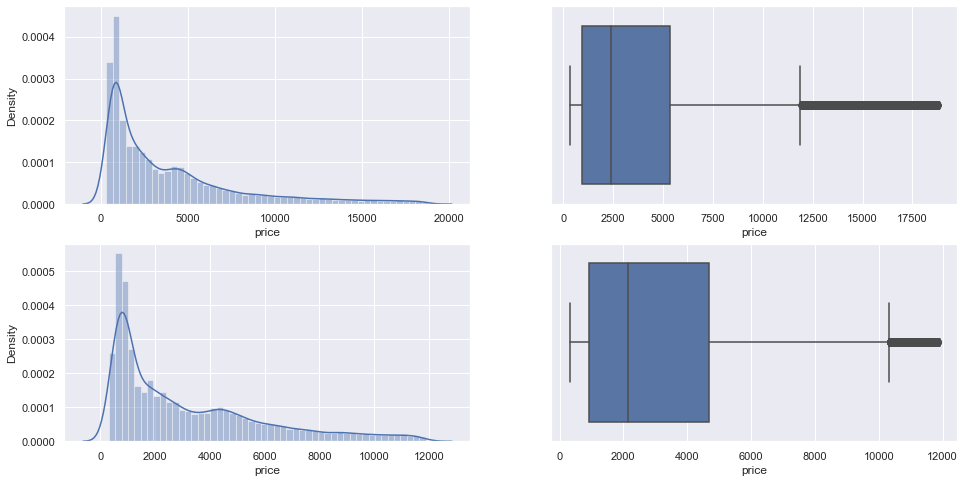

In [22]:
# Compare the plots after trimming

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(diamond_data['price'])
plt.subplot(2,2,2)
sns.boxplot(diamond_data['price'])
plt.subplot(2,2,3)
sns.distplot(new_diamond['price'])
plt.subplot(2,2,4)
sns.boxplot(new_diamond['price'])
plt.show()

In [23]:
# Capping

new_diamond_cap = diamond_data.copy()
new_diamond_cap['price'] = np.where(
    new_diamond_cap['price'] > upper,
    upper,
    np.where(
        new_diamond_cap['price'] < lower,
        lower,
        new_diamond_cap['price']
    )
)

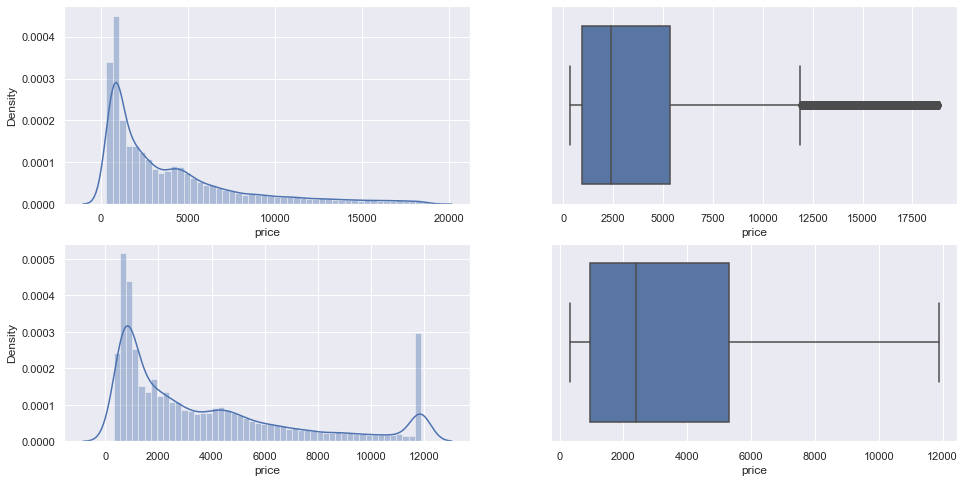

In [24]:
# Compare the plots after capping

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(diamond_data['price'])
plt.subplot(2,2,2)
sns.boxplot(diamond_data['price'])
plt.subplot(2,2,3)
sns.distplot(new_diamond_cap['price'])
plt.subplot(2,2,4)
sns.boxplot(new_diamond_cap['price'])
plt.show()

From above boxplot we notice that the verticel line inside the boxplot represents that the median is much closer to the first quartile of than the third quartile, which means the distribution is right-skewed.

# Univariate Analysis

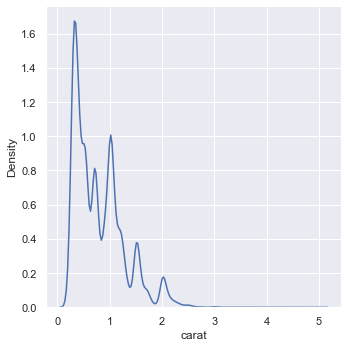

In [25]:
sns.displot(new_diamond_cap, x = "carat", kind = 'kde')

We can infer that the diamond carat falls between 0-2 and also its density is increasing from 0 to 1.6 and then the weight of diamond is starts dropping.

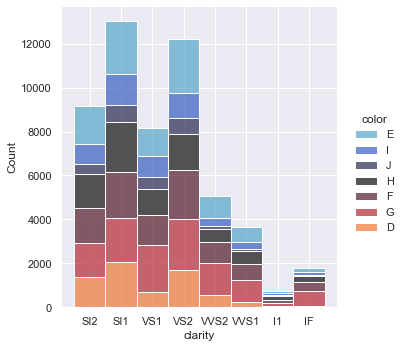

In [26]:
sns.displot(new_diamond_cap, x='clarity', hue= 'color', multiple= 'stack', palette= "icefire")

From this displot we can infer that color 'E' have the highest count according to its clarity and in clarity 'SI 1' count of the color 'E' is above 12000 which shows that color 'E' have highest count among all the categories of clarity.

### Pie Chart of Diamond with their colors

In [27]:
color_names = new_diamond_cap['color'].value_counts().index
color_names

Index(['G', 'E', 'F', 'H', 'D', 'I', 'J'], dtype='object')

In [28]:
color_values = new_diamond_cap['color'].value_counts().values
color_values

array([11254,  9776,  9517,  8266,  6754,  5406,  2802], dtype=int64)

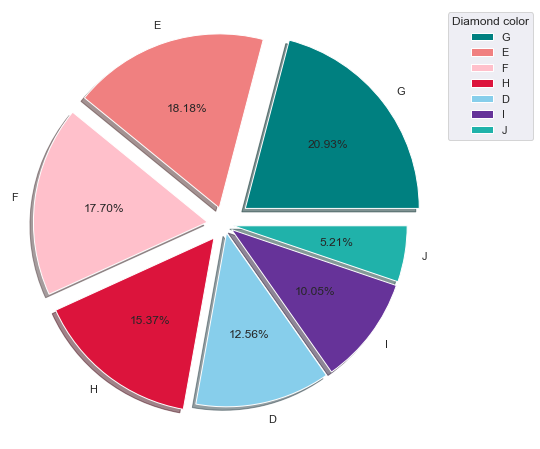

In [29]:
plt.figure(figsize=(10, 8))
colors = ["teal", "lightcoral", "pink", "crimson", 
          "skyblue", "rebeccapurple", "lightseagreen"]

plt.pie(color_values, labels = color_names, autopct = "%1.2f%%", shadow = True, 
        explode = [0.15, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05], colors = colors)

plt.legend(bbox_to_anchor =(1, 0, 0.05, 1), title= "Diamond color")
plt.show()

This above pie chart is of color of diamonds and the color ranges from D, E, F, G, H, I, J where D is the best color and J is worst color.
And from this Pie chart we can observe that the G is the median of the distribution of color with 20.93% of Diamonds. 

# Bivariate analysis

### For distribution of prices of diamonds with weight of diamonds

In [30]:
new_diamond_cap[["carat", "price"]]

,carat,price
0,0.23,326.0
1,0.21,326.0
2,0.23,327.0
3,0.29,334.0
4,0.31,335.0
...,...,...
53935,0.72,2757.0
53936,0.72,2757.0
53937,0.70,2757.0
53938,0.86,2757.0


### Carat vs Price

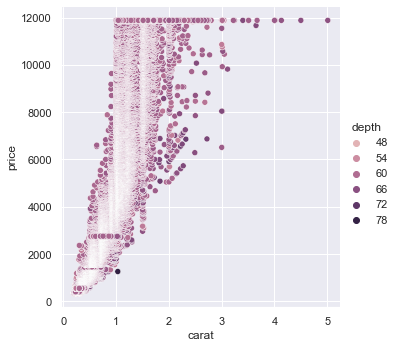

In [31]:
sns.relplot(data = new_diamond_cap, x = "carat", y = "price", hue= "depth")

This relplot between price and carat we can clearly see that the depth of 78% having carat of 1 and its price shows nearby 1600$.

And some diamonds have depth of 66% have carat 4 and 5 and their price is approximately 12000$.

### Cut vs Price

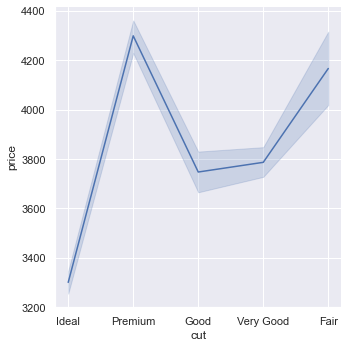

In [32]:
sns.relplot(data = new_diamond_cap, x="cut", y = "price", kind= "line") 

The above relplot is between cut and the price shows that the 'Premium' diamonds have the highest price and the 'ideal' have the lowest price. And also we see that the distribution of price between the different cut categories differs; as such cut could potentially be a predictor of price.

### Calculating the size of the diamonds by using its dimensions x, y and z

In [33]:
new_diamond_cap["size"] = new_diamond_cap["x"] * new_diamond_cap["y"] * new_diamond_cap["z"]
new_diamond_cap.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,51.917250
5,0.24,Very Good,J,VVS2,62.8,57.0,336.0,3.94,3.96,2.48,38.693952
6,0.24,Very Good,I,VVS1,62.3,57.0,336.0,3.95,3.98,2.47,38.830870
7,0.26,Very Good,H,SI1,61.9,55.0,337.0,4.07,4.11,2.53,42.321081
8,0.22,Fair,E,VS2,65.1,61.0,337.0,3.87,3.78,2.49,36.425214
9,0.23,Very Good,H,VS1,59.4,61.0,338.0,4.00,4.05,2.39,38.718000


### Size vs Price

<AxesSubplot:xlabel='size', ylabel='price'>

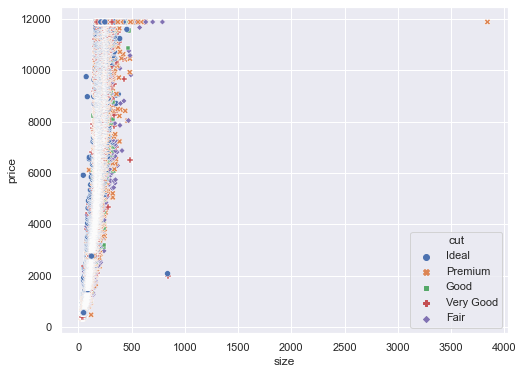

In [34]:
plt.figure(figsize= (8, 6))
sns.scatterplot(data = new_diamond_cap, x = 'size', y = 'price',
                style = 'cut', hue = 'cut')

From the above relplot we can conclude that diamond with cut of 'very good' and 'ideal' both price is nearly 2100$ with same size which is approximately 700. 

# Splitting to train and test

In [35]:
new_diamond_cap["cut"] = new_diamond_cap["cut"].map({"Ideal": 1, "Premium": 2, "Good": 3, 
                                                     "Very Good": 4, "Fair": 5})

In [36]:
new_diamond_cap["clarity"] = new_diamond_cap["clarity"].map({"SI2": 1, "SI1": 2, "VS1": 3, "VS2": 4, 
                                                            "VVS2": 5, "VVS1": 6, "I1": 7, "IF": 8})

In [37]:

from sklearn.model_selection import train_test_split

x = np.array(new_diamond_cap[["carat", "cut", "clarity", "size"]])
y = np.array(new_diamond_cap[["price"]])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

# Evaluating the Random Forest Regressor model

In [39]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
print("Enter diamond details to predict price: ")

a = float(input("Diamond carat : "))
b = int(input("Diamond cut type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5)= "))
c = int(input("Diamond clarity type (SI2: 1, SI1: 2, VS1: 3, VS2: 4, VVS2: 5, VVS1: 6, I1: 7, IF: 8)= "))
d = float(input("Diamond size: "))

features = np.array([[a, b, c, d]])

print("Predicted diamond price = ", model.predict(features))

Enter diamond details to predict price: 
Diamond carat : 0.52
Diamond cut type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5)= 1
Diamond clarity type (SI2: 1, SI1: 2, VS1: 3, VS2: 4, VVS2: 5, VVS1: 6, I1: 7, IF: 8)= 2
Diamond size: 45
Predicted diamond price =  [763.52033333]
